In [2]:
import pandas as pd

birddata = pd.read_csv('bird_tracking.csv')

In [3]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [5]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
ix = birddata.bird_name == 'Eric'

In [11]:
x, y = birddata.longitude[ix], birddata.latitude[ix]

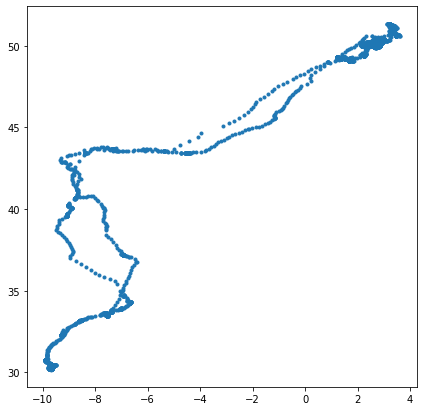

In [12]:
plt.figure(figsize=(7,7))
plt.plot(x,y,".")

In [15]:
bird_names = pd.unique(birddata.bird_name)

In [16]:
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

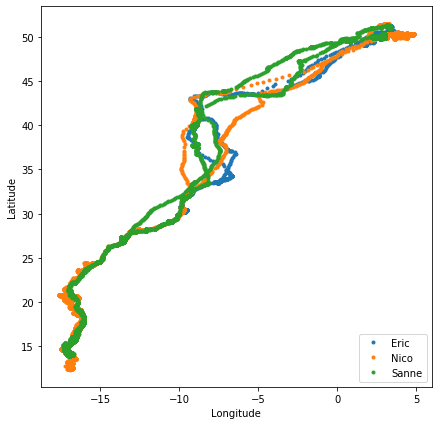

In [18]:
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x,y,".", label=bird_name)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='lower right')

(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <a list of 10 Patch objects>)

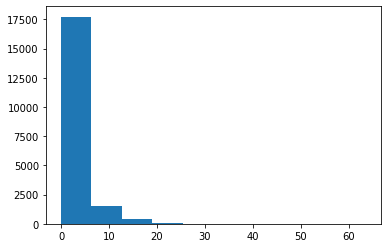

In [19]:
ix = birddata.bird_name == 'Eric'
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Frequency')

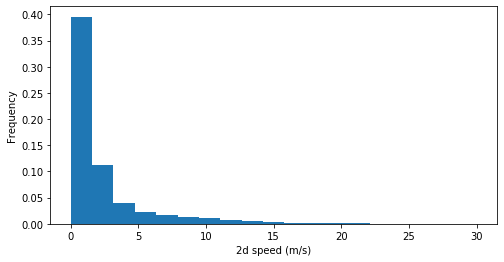

In [20]:
plt.figure(figsize=(8,4))
speed = birddata.speed_2d[birddata.bird_name == 'Eric']
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0,30,20), normed=True)
plt.xlabel('2d speed (m/s)')
plt.ylabel('Frequency')

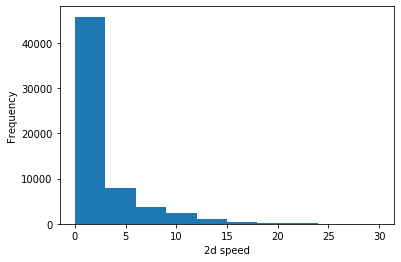

In [21]:
birddata.speed_2d.plot(kind='hist', range=[0,30])
plt.xlabel('2d speed')
plt.savefig('pd_hist.pdf')